In [21]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.model_selection  import cross_val_score
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler

In [22]:
datosPacientes = pd.read_csv('depresjon-dataset/data/scores.csv', na_values='--undefined--')
datosPacientes = datosPacientes.drop(columns=['number'])
datosPacientes = datosPacientes.drop(columns=['days'])



In [23]:
np.random.seed(10)
remove_n = 8
drop_indices = np.random.choice(datosPacientes[datosPacientes['afftype'] == 2].index, remove_n, replace=False)
datosPacientes = datosPacientes.drop(drop_indices).reset_index(drop=True)
hours = 2
n_hour_class = int(24 / hours)
resample_hour = '2H'

In [24]:
aux = list(range(0,22))
aux = [x for x in aux if x not in drop_indices]
actividadPaciente = []
for i in aux:
    path = 'depresjon-dataset/data/condition/condition_' + str(i+1) + '.csv'
    actividadPaciente.append(pd.read_csv(path, na_values='--undefined--'))

In [25]:
datosPacientes

,gender,age,afftype,inpatient,edu,marriage,work,madrs1,madrs2
0,2,35-39,2,2,6-10,1,2,19,19
1,2,40-44,1,2,6-10,2,2,24,11
2,1,45-49,2,2,6-10,2,2,24,25
3,1,35-39,2,2,6-10,1,2,18,15
4,1,20-24,1,2,11-15,2,1,24,25
5,2,45-49,1,2,6-10,1,2,26,26
6,2,40-44,1,2,6-10,2,2,25,21
7,2,35-39,1,2,11-15,2,2,18,13
8,1,60-64,1,2,6-10,2,2,28,19
9,1,45-49,2,2,11-15,1,2,13,17


In [26]:
for i in range(0, 22 - remove_n):
    actividadPaciente[i] = actividadPaciente[i].drop(columns=['date'])


In [27]:
for i in range(0, 22 - remove_n):
    actividadPaciente[i].index = pd.DatetimeIndex(actividadPaciente[i].timestamp)
    aux = actividadPaciente.copy()
    actividadPaciente[i] = round(aux[i].resample(resample_hour).mean(),2)
    actividadPaciente[i]['sumActivity'] = round(aux[i].resample(resample_hour).sum(),2)
    actividadPaciente[i]['stdActivity'] = round(aux[i].resample(resample_hour).std()['activity'],2)
    actividadPaciente[i]['varActivity'] = round(aux[i].resample(resample_hour).var()['activity'],2)
    actividadPaciente[i]['max'] = aux[i].resample(resample_hour).max()['activity']
    actividadPaciente[i]['min'] = aux[i].resample(resample_hour).min()['activity']
    

    actividadPaciente[i]=actividadPaciente[i].rename(columns = {'activity':'meanActivity'})

#actividadPaciente.resample('1H').sum()

In [28]:
for i in range(0, 22 - remove_n):
    actividadPaciente[i]['hour'] = actividadPaciente[i].index
    actividadPaciente[i].hour = actividadPaciente[i].hour.astype(str).tolist()
    actividadPaciente[i] = actividadPaciente[i].reset_index(drop=True)

In [29]:
for i in range(0, 22 - remove_n):
    times = []
    for time in actividadPaciente[i].hour:
        times.append(time.split(' ')[1])
    actividadPaciente[i].hour = times

In [30]:
for j in range(0,22 - remove_n):
    print(j, sum(actividadPaciente[j].meanActivity[math.trunc(len(actividadPaciente[j])*0.90):]))
    while(sum(actividadPaciente[j].meanActivity[math.trunc(len(actividadPaciente[j])*0.80):]) < sum(actividadPaciente[j].meanActivity[:math.trunc((len(actividadPaciente[j])*0.20)/3)])):
        actividadPaciente[j] = actividadPaciente[j][:math.trunc(len(actividadPaciente[j])*0.95)]
        print(j, sum(actividadPaciente[j].meanActivity[math.trunc(len(actividadPaciente[j])*0.90):]))

0 885.6399999999999
1 842.5699999999998
1 274.7299999999999
1 272.13
1 240.66000000000003
1 216.40999999999997
2 4578.140000000001
3 1762.85
4 822.9599999999999
4 694.32
4 482.24999999999994
5 2804.1600000000003
6 197.02999999999997
6 630.8699999999999
6 851.9599999999999
7 79.07999999999998
7 4.670000000000001
8 823.5000000000002
8 1341.7
9 1672.0300000000002
9 1210.51
9 11.01
9 6.739999999999999
9 2.7899999999999996
9 0.47000000000000003
9 0.02
9 0.04
9 0.81
9 1458.9899999999998
10 1290.0200000000002
11 27.450000000000003
11 0.0
11 0.0
11 418.94
12 2046.4099999999999
13 86.18
13 12.7
13 17.930000000000003


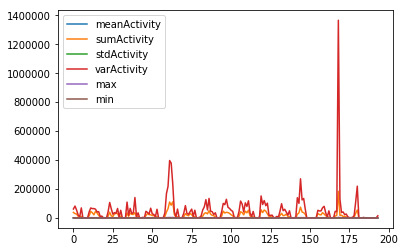

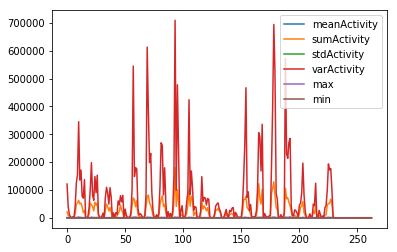

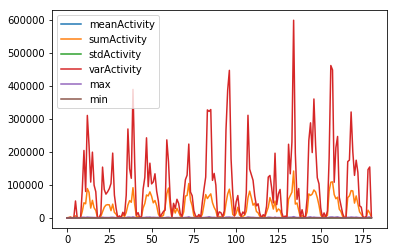

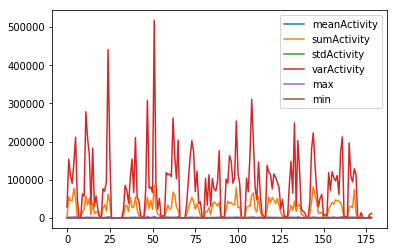

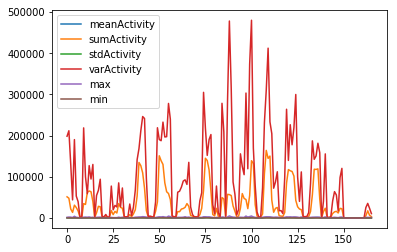

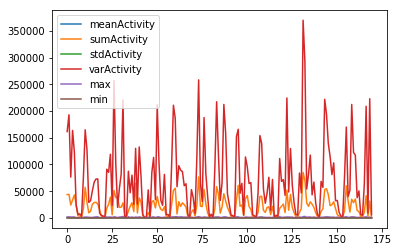

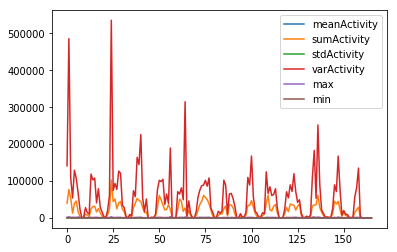

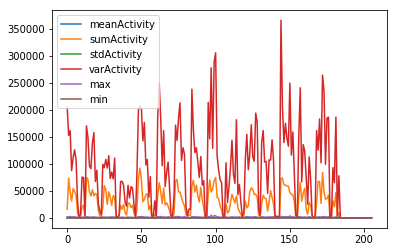

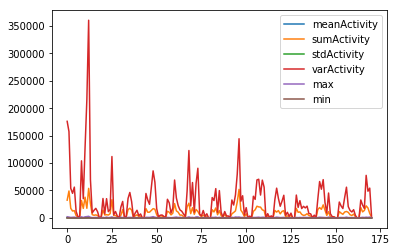

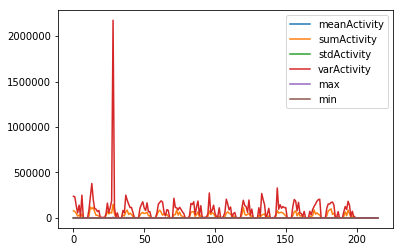

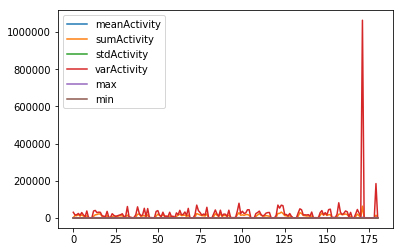

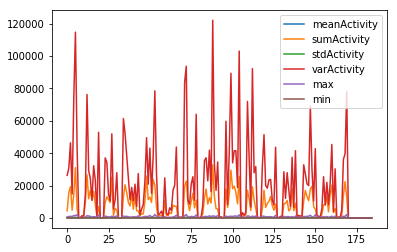

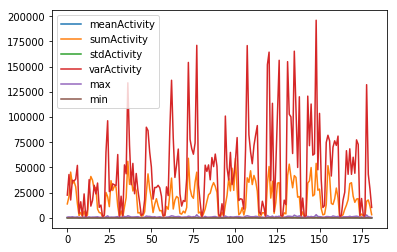

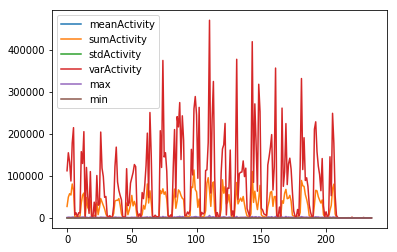

In [31]:
for i in range(0, 22 - remove_n):
    actividadPaciente[i].plot()

In [32]:
finalDF = pd.DataFrame()
for i in range(0, 22 - remove_n):
    df1 = actividadPaciente[i]
    df2 = datosPacientes[i:i+1].reindex(datosPacientes[i:i+1].index.repeat(len(actividadPaciente[i]))).reset_index(drop=True)
    auxDF = pd.concat([df1,df2], axis=1)
    finalDF = pd.concat([finalDF,auxDF]).reset_index(drop=True)

In [33]:
le = preprocessing.LabelEncoder()
finalDF.age = le.fit_transform(finalDF.age)
finalDF.edu = le.fit_transform(finalDF.edu)
finalDF.hour = le.fit_transform(finalDF.hour)
finalDF = finalDF[~finalDF['stdActivity'].isnull()]
X_activity = finalDF.drop(['afftype'], axis=1)
scaler = MinMaxScaler()

X_activity.meanActivity = scaler.fit_transform(np.expand_dims(X_activity.meanActivity, axis=1))
X_activity.stdActivity = scaler.fit_transform(np.expand_dims(X_activity.stdActivity, axis=1))
X_activity.madrs1 = scaler.fit_transform(np.expand_dims(X_activity.madrs1, axis=1))
X_activity.madrs2 = scaler.fit_transform(np.expand_dims(X_activity.madrs2, axis=1))
X_activity.varActivity = scaler.fit_transform(np.expand_dims(X_activity.varActivity, axis=1))
X_activity.sumActivity = scaler.fit_transform(np.expand_dims(X_activity.sumActivity, axis=1))
X_activity['max'] = scaler.fit_transform(np.expand_dims(X_activity['max'], axis=1))
X_activity['min'] = scaler.fit_transform(np.expand_dims(X_activity['min'], axis=1))
y_activity = finalDF.afftype
#X_activity

/home/ismael/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [34]:
X_activity = X_activity.drop(['gender'], axis=1)
X_activity = X_activity.drop(['age'], axis=1)
X_activity = X_activity.drop(['inpatient'], axis=1)
X_activity = X_activity.drop(['edu'], axis=1)
X_activity = X_activity.drop(['marriage'], axis=1)
X_activity = X_activity.drop(['work'], axis=1)
#X_activity = X_activity.drop(['activity'], axis=1)
X_activity = X_activity.drop(['madrs1'], axis=1)
X_activity = X_activity.drop(['madrs2'], axis=1)
X_activity = X_activity.drop(['sumActivity'], axis=1)
#X_activity = X_activity.drop(['varActivity'], axis=1)
#X_activity = X_activity.drop(['stdActivity'], axis=1)
#X_activity = X_activity.drop(['max'], axis=1)
#X_activity = X_activity.drop(['min'], axis=1)
#X_activity = X_activity.drop(['meanActivity'], axis=1)

In [35]:
X_activity.head()

,meanActivity,stdActivity,varActivity,max,min,hour
0,0.205931,0.168182,0.028286,0.175330,0.0,6
1,0.162481,0.193948,0.037617,0.225445,0.0,7
2,0.146310,0.158683,0.025180,0.169730,0.0,8
3,0.061859,0.095794,0.009176,0.105399,0.0,9
4,0.046164,0.062299,0.003881,0.069644,0.0,10


In [36]:
mejorC = 0
mejorGamma = 0
maxPredictSVM = 0.0
for i in [1, 10, 100, 1000]:
    for j in [0.001]:
        model = SVC(kernel='rbf', C=i, gamma=j)
        scores = cross_val_score(model, X_activity, y_activity, cv=10, scoring='accuracy')
        if scores.mean() > maxPredictSVM:
            maxPredictSVM = scores.mean()
            mejorC = i
            mejorGamma = j
        print('C =', i, 'gamma =', j, ':', scores.mean())

C = 1 gamma = 0.001 : 0.5092731038834551
C = 10 gamma = 0.001 : 0.5092731038834551
C = 100 gamma = 0.001 : 0.48027682135557415
C = 1000 gamma = 0.001 : 0.48803687293378506


In [37]:
bestNumberOfEstimatorsRFC = 0
maxValueRFC = 0
for i in range(1, 101, 10):
    model = RandomForestClassifier(n_estimators=i)
    scores = cross_val_score(model, X_activity, y_activity, cv=10, scoring='accuracy')
    if scores.mean() > maxValueRFC:
        maxValueRFC = scores.mean()
        bestNumberOfEstimatorsRFC = i
    print('Numero estimadores' , i)
    print(scores.mean())

Numero estimadores 1
0.5395780463380843
Numero estimadores 11
0.5566866486508731
Numero estimadores 21
0.5629240455973333
Numero estimadores 31
0.5703727074445466
Numero estimadores 41
0.5681339936075941
Numero estimadores 51
0.5800244173445451
Numero estimadores 61
0.5736992276985966
Numero estimadores 71
0.5781684248069245
Numero estimadores 81
0.5722314435040261
Numero estimadores 91
0.5755881424985254


In [38]:
bestNumberOfEstimatorsGBC = 0
maxValueGBC = 0.0
for i in range(1, 101, 10):
    model = GradientBoostingClassifier(random_state=1, n_estimators=i)
    scores = cross_val_score(model, X_activity, y_activity, cv=10, scoring='accuracy')
    if scores.mean() > maxValueGBC:
        maxValueGBC = scores.mean()
        bestNumberOfEstimatorsGBC = i
    print('Numero estimadores' , i)
    print(scores.mean())

Numero estimadores 1
0.45816129165009123
Numero estimadores 11
0.4840930602614576
Numero estimadores 21
0.5185612971371351
Numero estimadores 31
0.5255668802041181
Numero estimadores 41
0.5392940918256766
Numero estimadores 51
0.5511296451254475
Numero estimadores 61
0.557441117162101
Numero estimadores 71
0.5630090947749626
Numero estimadores 81
0.564468648403956
Numero estimadores 91
0.5677979121798653


In [39]:
model = clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                     hidden_layer_sizes=(50, 50), random_state=1)
scores = cross_val_score(model, X_activity, y_activity, cv=10, scoring='accuracy')
print(scores.mean())

0.5402776444121319


In [40]:
activity = pd.concat([X_activity, y_activity], axis=1)
prueba1 = []
prueba2 = []
for i in range(0, n_hour_class):
    aux1 = activity[(activity['hour'] == i) & (activity['afftype'] == 1)]
    aux2 = activity[(activity['hour'] == i) & (activity['afftype'] == 2)]
    prueba1.append(aux1['meanActivity'].mean())
    prueba2.append(aux2['meanActivity'].mean())

In [41]:
for i in range(0, n_hour_class):
    print(i, prueba1[i] - prueba2[i])

0 0.013785392083503961
1 0.015245128767614202
2 0.01664824492004477
3 0.05399811411645604
4 0.044213111711102454
5 0.0070189445117530835
6 -0.021265884039644717
7 -0.05327980970943447
8 -0.05596581655493893
9 -0.04547970492078299
10 -0.030899571864694844
11 -0.02575282966183276


In [43]:
finalDF

,meanActivity,sumActivity,stdActivity,varActivity,max,min,hour,gender,age,afftype,inpatient,edu,marriage,work,madrs1,madrs2
0,315.56,37867,248.04,61526.05,1221,0,6,2,2,2,2,2,1,2,19,19
1,248.98,29878,286.04,81820.27,1570,0,7,2,2,2,2,2,1,2,19,19
2,224.20,26904,234.03,54769.81,1182,0,8,2,2,2,2,2,1,2,19,19
3,94.79,11375,141.28,19958.80,734,0,9,2,2,2,2,2,1,2,19,19
4,70.74,8489,91.88,8441.86,485,0,10,2,2,2,2,2,1,2,19,19
5,90.59,10871,262.96,69147.71,2284,0,11,2,2,2,2,2,1,2,19,19
6,6.04,725,33.11,1096.16,296,0,0,2,2,2,2,2,1,2,19,19
7,5.55,666,29.33,860.45,268,0,1,2,2,2,2,2,1,2,19,19
8,6.59,791,22.09,488.01,116,0,2,2,2,2,2,2,1,2,19,19
9,11.85,1422,31.80,1011.24,148,0,3,2,2,2,2,2,1,2,19,19
